In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
df=pd.read_csv("D:/DSML/DataSet/beer-servings.csv")
df.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [153]:
df.tail()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
188,188,Venezuela,NaN,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa
192,192,Zimbabwe,64.0,18.0,4.0,4.7,Africa


In [154]:
df.shape

(193, 7)

In [155]:
df.columns

Index(['Unnamed: 0', 'country', 'beer_servings', 'spirit_servings',
       'wine_servings', 'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [156]:
df.describe()

,Unnamed: 0,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,185.000000,185.000000,187.000000,192.000000
mean,96.000000,105.124324,83.221622,50.165775,4.741667
std,55.858452,100.524714,89.142958,80.358868,3.767654
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,20.000000,4.000000,1.000000,1.300000
50%,96.000000,76.000000,60.000000,9.000000,4.250000
75%,144.000000,185.000000,132.000000,60.500000,7.200000
max,192.000000,376.000000,438.000000,370.000000,14.400000


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    193 non-null    int64  
 1   country                       193 non-null    object 
 2   beer_servings                 185 non-null    float64
 3   spirit_servings               185 non-null    float64
 4   wine_servings                 187 non-null    float64
 5   total_litres_of_pure_alcohol  192 non-null    float64
 6   continent                     193 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 10.7+ KB


In [158]:
df.isnull().sum()

Unnamed: 0                      0
country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

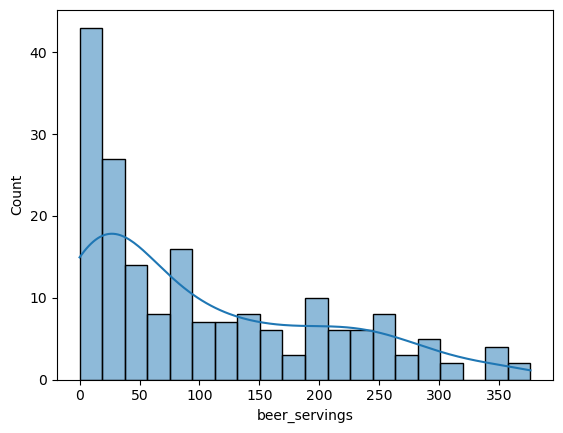

In [159]:
sns.histplot(x='beer_servings', data=df, kde=True, bins=20)
plt.show()

- Here not normal distribution the best way of replace with median

In [160]:
df['beer_servings'] = df['beer_servings'].fillna(df['beer_servings'].median())


In [161]:
df.isnull().sum()

Unnamed: 0                      0
country                         0
beer_servings                   0
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

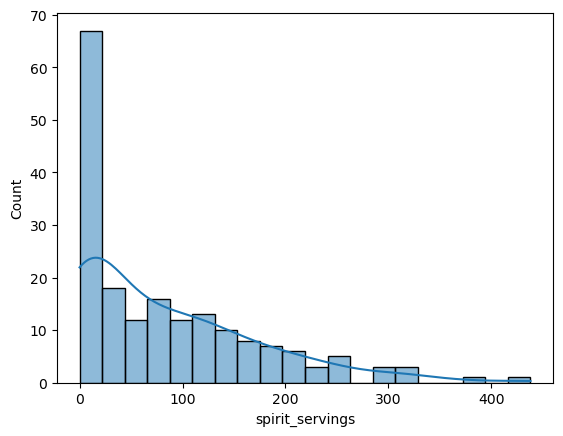

In [162]:
sns.histplot(data=df,x='spirit_servings',kde=True,bins=20)
plt.show()

- this is not a normal distribution curve here perfectly replace with median

In [163]:
df['spirit_servings']=df['spirit_servings'].fillna(df.spirit_servings.median())

In [164]:
df.isnull().sum()

Unnamed: 0                      0
country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

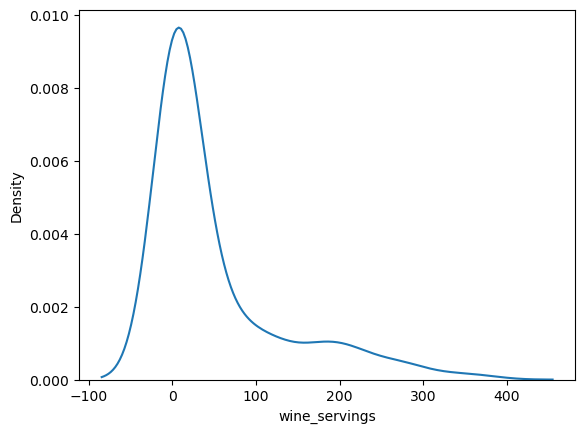

In [165]:
sns.kdeplot(df,x='wine_servings')
plt.show()

- here not a normal distribution

In [166]:
df['wine_servings']=df['beer_servings'].fillna(df.wine_servings.median())

In [167]:
df.isnull().sum()

Unnamed: 0                      0
country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

- total_litres_of_pure_alcohol only a 0.5181% null value the better way is removed

In [168]:
df.dropna(how='any',axis=0,inplace=True)

In [169]:
df.isnull().sum()

Unnamed: 0                      0
country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

- here we properly handled in null values

In [170]:
df.duplicated().sum()

np.int64(0)

- Drop the unwanted columns

In [171]:
df.drop(columns='Unnamed: 0',inplace=True)

In [172]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,192.00000,192.000000,192.00000,192.000000
mean,104.06250,82.375000,104.06250,4.741667
std,98.81712,87.602954,98.81712,3.767654
min,0.00000,0.000000,0.00000,0.000000
25%,21.00000,4.750000,21.00000,1.300000
50%,76.00000,60.000000,76.00000,4.250000
75%,171.50000,128.750000,171.50000,7.200000
max,376.00000,438.000000,376.00000,14.400000


# Outlier Handleing

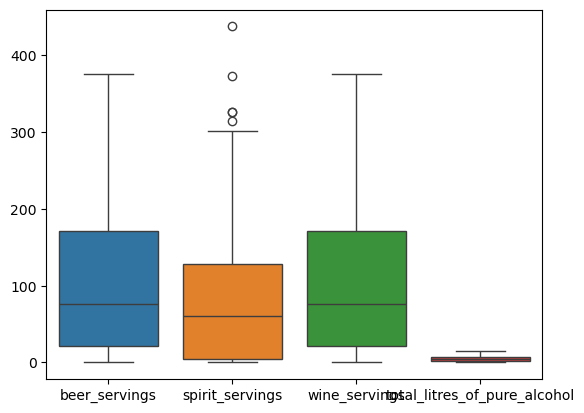

In [173]:
sns.boxplot(df)
plt.show()

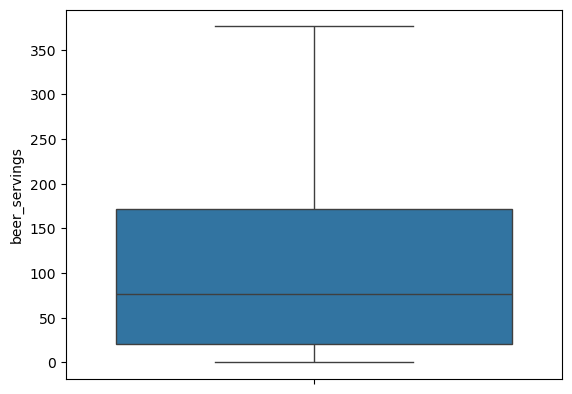

In [174]:
sns.boxplot(data=df,y='beer_servings')
plt.show()

In [175]:
q1=np.percentile(df['beer_servings'],25)
q3=np.percentile(df['beer_servings'],75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
print(lower_limit)
print(upper_limit)

-204.75
397.25


In [176]:
outlier=[]
for x in df['beer_servings']:
    if (x<lower_limit or x>upper_limit):
        outlier.append(x)
print(outlier)
print('Total outlier',len(outlier))

[]
Total outlier 0


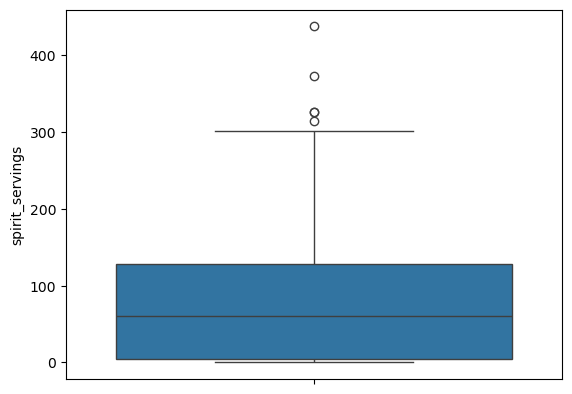

In [177]:
sns.boxplot(df,y='spirit_servings')
plt.show()

In [178]:
q1=np.percentile(df['spirit_servings'],25)
q3=np.percentile(df['spirit_servings'],75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
print(lower_limit)
print(upper_limit)

-181.25
314.75


In [179]:
outlier=[]
for x in df['spirit_servings']:
    if (x>upper_limit or x<lower_limit):
        outlier.append(x)
print(outlier)
print('len of outlier',len(outlier))

[373.0, 438.0, 326.0, 326.0, 315.0]
len of outlier 5


In [180]:
df_trimmed = df[(df['beer_servings'] >= lower_limit) & (df['beer_servings'] <= upper_limit)]


In [181]:
print("Original rows:", len(df))
print("Rows after removing 5% outliers:", len(df_trimmed))


Original rows: 192
Rows after removing 5% outliers: 186


In [182]:
removed_percentage = ((len(df) - len(df_trimmed)) / len(df)) * 100
print(f"Percentage removed: {removed_percentage:.2f}%")


Percentage removed: 3.12%


- only 3% the better way is romve the outlier

In [183]:
ind1=df['spirit_servings']>upper_limit
a=df.loc[ind1].index

In [184]:
df.drop(a,inplace=True)


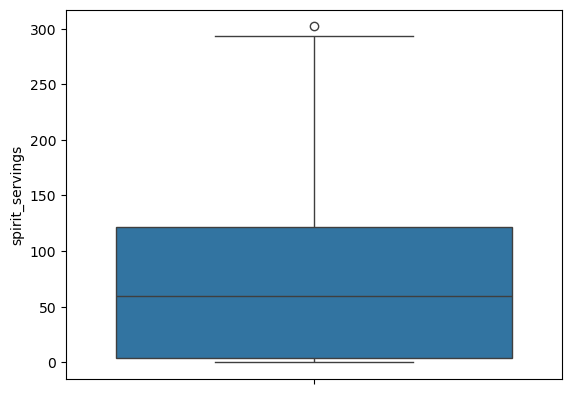

In [185]:
sns.boxplot(df,y='spirit_servings')
plt.show()

In [186]:
outlier=[]
for x in df['spirit_servings']:
    if (x>upper_limit or x<lower_limit):
        outlier.append(x)
print(outlier)
print('Total number of outlier',len(outlier))

[]
Total number of outlier 0


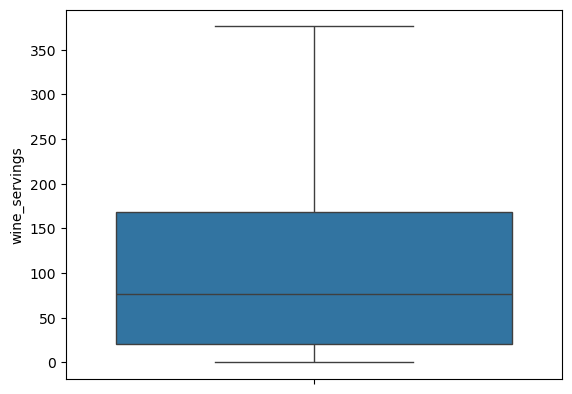

In [187]:
sns.boxplot(df,y='wine_servings')
plt.show()

In [188]:
q1=np.percentile(df['wine_servings'],25)
q3=np.percentile(df['wine_servings'],75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
print(lower_limit)
print(upper_limit)

-199.5
388.5


In [189]:
outlier=[]
for x in df['wine_servings']:
    if (x>upper_limit or x<lower_limit):
        outlier.append(x)
print(outlier)
print('total number or outlier',len(outlier))

[]
total number or outlier 0


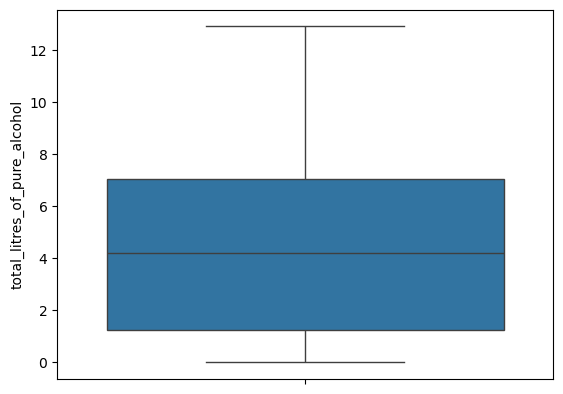

In [190]:
sns.boxplot(df,y='total_litres_of_pure_alcohol')
plt.show()

In [191]:
q1=np.percentile(df['total_litres_of_pure_alcohol'],25)
q3=np.percentile(df['total_litres_of_pure_alcohol'],75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
print(lower_limit)
print(upper_limit)

-7.449999999999999
15.75


In [192]:
outlier=[]
for x in df['total_litres_of_pure_alcohol']:
    if (x>upper_limit or x<lower_limit):
        outlier.append(x)
print(outlier)
print('total number or outlier',len(outlier))

[]
total number or outlier 0


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       187 non-null    object 
 1   beer_servings                 187 non-null    float64
 2   spirit_servings               187 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  187 non-null    float64
 5   continent                     187 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.2+ KB


In [194]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,187.000000,187.000000,187.000000,187.000000
mean,102.780749,75.069519,102.780749,4.580749
std,98.885945,75.919245,98.885945,3.656038
min,0.000000,0.000000,0.000000,0.000000
25%,21.000000,4.000000,21.000000,1.250000
50%,76.000000,60.000000,76.000000,4.200000
75%,168.000000,122.000000,168.000000,7.050000
max,376.000000,302.000000,376.000000,12.900000


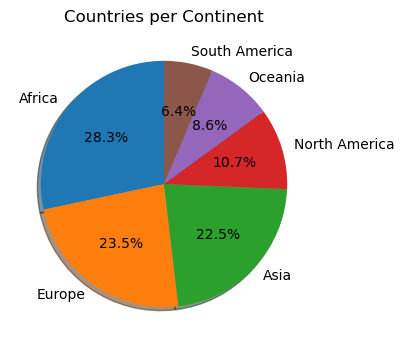

In [195]:
continent_counts = df['continent'].value_counts()

labels = continent_counts.index      
sizes = continent_counts.values      

plt.figure(figsize=(4,4)) 
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%',  
    startangle=90,      
    shadow=True
)
plt.title("Countries per Continent")
plt.show()


# Bivarite Analysis

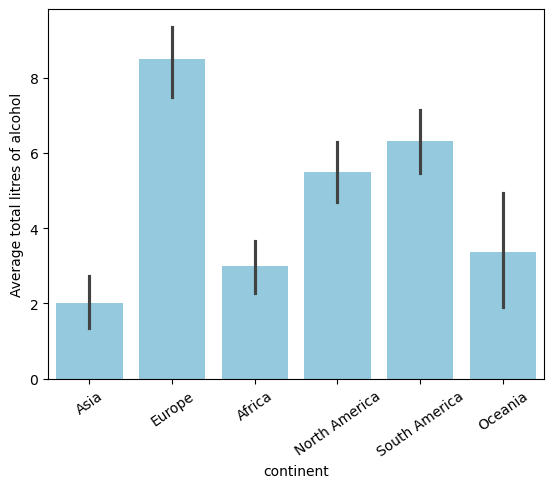

In [196]:
sns.barplot(
    x='continent',
    y='total_litres_of_pure_alcohol',
    data=df,
    color='skyblue'
)
plt.xticks(rotation=35)
plt.ylabel("Average total litres of alcohol")
plt.show()


- most of pure total_litres_of_pure_alcohol in europe

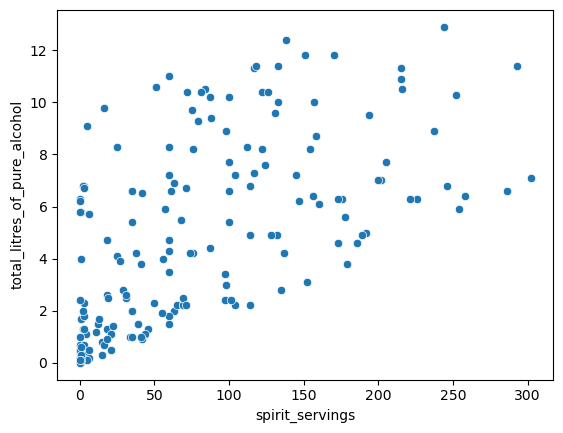

In [197]:
sns.scatterplot(df,x='spirit_servings',y='total_litres_of_pure_alcohol')
plt.show()

In [198]:
top=df.groupby('country')['total_litres_of_pure_alcohol'].mean().reset_index()
top5 = top.sort_values(by='total_litres_of_pure_alcohol', ascending=False).head(5)


In [199]:
top5

,country,total_litres_of_pure_alcohol
93,Lithuania,12.9
3,Andorra,12.4
58,France,11.8
43,Czech Republic,11.8
94,Luxembourg,11.4


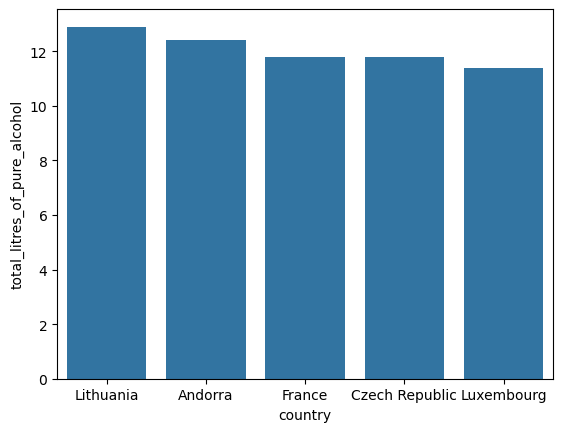

In [200]:
sns.barplot(top5,x='country',y='total_litres_of_pure_alcohol')
plt.show()

# Encoding

- here my data nominal data 

In [214]:
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [215]:
x=df.drop(columns=['total_litres_of_pure_alcohol'])
y=df['total_litres_of_pure_alcohol']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [216]:
target_cols=['country']
one_hot=['continent']
target_encode=TargetEncoder(cols=target_cols)
one_hot=OneHotEncoder(handle_unknown='ignore',sparse_output=False)

In [217]:

X_train['country_encoded'] = target_encode.fit_transform(X_train['country'], y_train)
X_test['country_encoded'] = target_encode.transform(X_test['country'])


In [218]:
one_hot_enode_train=one_hot.fit_transform(X_train[['continent']])
one_hot_encode_test=one_hot.transform(X_test[['continent']])

In [219]:

continent_encoded_train = pd.DataFrame(one_hot_enode_train, columns=one_hot.get_feature_names_out(['continent']))
continent_encoded_test = pd.DataFrame(one_hot_encode_test, columns=one_hot.get_feature_names_out(['continent']))


In [220]:

X_train = X_train.drop(['country', 'continent'], axis=1)
X_test = X_test.drop(['country', 'continent'], axis=1)

# Add encoded columns
X_train = pd.concat([X_train.reset_index(drop=True), continent_encoded_train], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), continent_encoded_test], axis=1)


In [221]:
X_train.head()


,beer_servings,spirit_servings,wine_servings,country_encoded,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,0.627660,0.440397,0.627660,0.436171,0.0,0.0,1.0,0.0,0.0,0.0
1,0.247340,1.000000,0.247340,0.392802,0.0,0.0,0.0,0.0,0.0,1.0
2,0.082447,0.377483,0.082447,0.370612,0.0,0.0,1.0,0.0,0.0,0.0
3,0.390957,0.003311,0.390957,0.379690,1.0,0.0,0.0,0.0,0.0,0.0
4,0.757979,0.344371,0.757979,0.393810,0.0,0.0,0.0,1.0,0.0,0.0


# Feature scaling

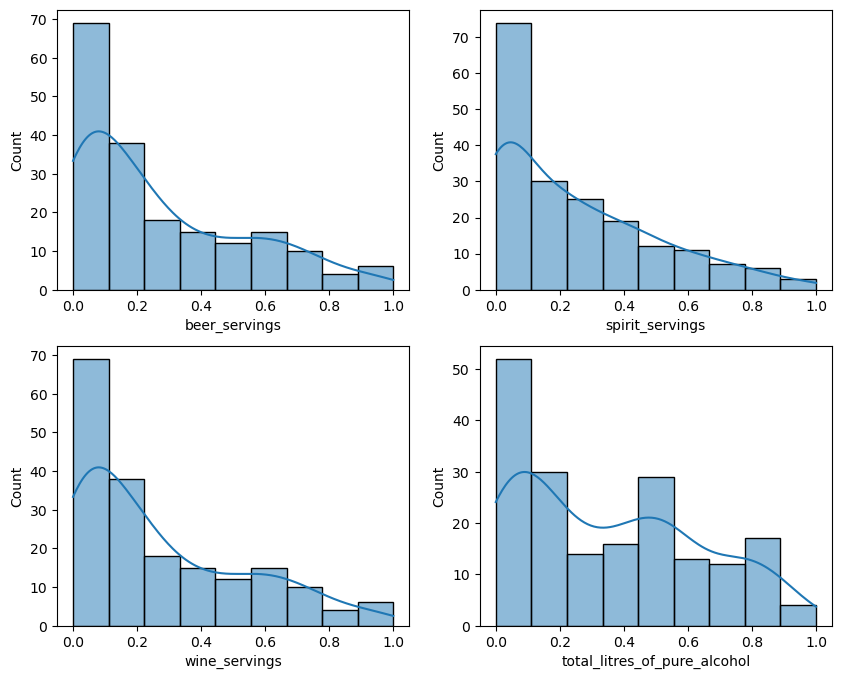

In [222]:
fig,axes=plt.subplots(2,2,figsize=(10,8))
sns.histplot(df['beer_servings'],kde=True,ax=axes[0,0])
sns.histplot(df['spirit_servings'],kde=True,ax=axes[0,1])
sns.histplot(df['wine_servings'],kde=True,ax=axes[1,0])
sns.histplot(df['total_litres_of_pure_alcohol'],kde=True,ax=axes[1,1])
plt.show()

- here not a noraml distrubution curve the best way of minmax sacler

In [223]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [224]:
X_test_scaled = scaler.transform(X_test)


In [225]:

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [226]:
X_train_scaled.head()

,beer_servings,spirit_servings,wine_servings,country_encoded,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,0.627660,0.440397,0.627660,0.883721,0.0,0.0,1.0,0.0,0.0,0.0
1,0.247340,1.000000,0.247340,0.550388,0.0,0.0,0.0,0.0,0.0,1.0
2,0.082447,0.377483,0.082447,0.379845,0.0,0.0,1.0,0.0,0.0,0.0
3,0.390957,0.003311,0.390957,0.449612,1.0,0.0,0.0,0.0,0.0,0.0
4,0.757979,0.344371,0.757979,0.558140,0.0,0.0,0.0,1.0,0.0,0.0
